# Loading a Dataset

In [1]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [4]:
# https://github.com/zalandoresearch/fashion-mnist

training_data = datasets.FashionMNIST(
    root="/home/hslee/Desktop/Datasets",
    train=True, # training data
    download=True,
    transform=ToTensor() # Convert a PIL Image or ndarray to tensor and scale the values accordingly.
)

test_data = datasets.FashionMNIST(
    root="/home/hslee/Desktop/Datasets",
    train=False, # test data
    download=True,
    transform=ToTensor() # Convert a PIL Image or ndarray to tensor and scale the values accordingly.
)

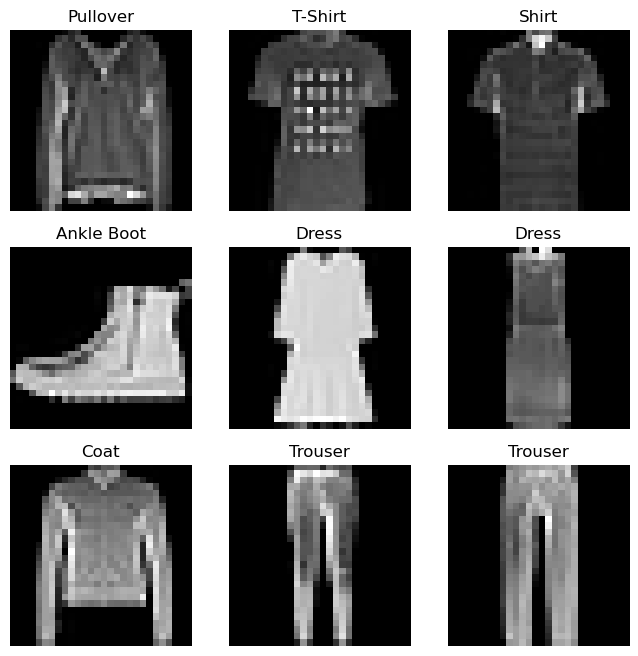

In [10]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot"
}

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3

for i in range(1, cols * rows + 1) :
    sample_idx = torch.randint(len(training_data), size=(1,)).item() # 1d tensor -> random scalar값 추출
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")  # 축 정보 출력 X
    plt.imshow(img.squeeze(), cmap="gray") # 1, 28, 28 -> 28, 28

# Creating a Custom Dataset for your files

In [ ]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset) :
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None) :
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform
    
    def __len__(self) :
        return len(self.img_labels)
    
    def __getitem__(self, idx) :
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0]) # 0번째 column
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform :
            image = self.transform(image)
        if self.target_transform :
            label = self.target_transform(label)
        sample = {"image" : image, "label" : label}
        return sample

# Preparing your data for training with DataLoaders

In [11]:
# https://pytorch.org/docs/stable/data.html
from torch.utils.data import DataLoader

In [12]:
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

## Iterate through the DataLoader

Feature batch shape : torch.Size([64, 1, 28, 28])
Labels batch shape : torch.Size([64])
Label : 3, Dress


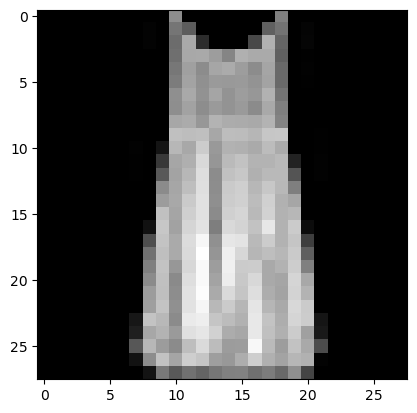

Feature batch shape : torch.Size([64, 1, 28, 28])
Labels batch shape : torch.Size([64])
Label : 5, Sandal


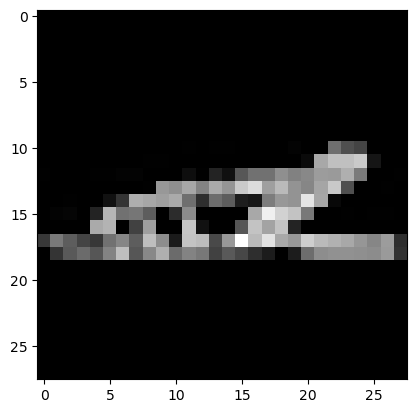

In [18]:
# Display image and label
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape : {train_features.size()}")
print(f"Labels batch shape : {train_labels.size()}")

label = train_labels[0]
print(f"Label : {label}, {labels_map[label.item()]}")

img = train_features[0].squeeze()
plt.imshow(img, cmap="gray")
plt.show()